# Market Analytics


<img src='img/webconsulting-marketing-digital.jpg'>

<font size="1.5">  

## Sección 01: Análisis exploratorio de datos
</font>

1. Importamos Librerias

In [663]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
import warnings

# Gráficos y Metricas
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns
from pandas_profiling import ProfileReport
from seaborn import lmplot
import plotly.graph_objs as go
from sklearn import metrics
from sklearn.preprocessing import RobustScaler
# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn import svm, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

2. Abrimos la data 

In [664]:
df=pd.read_csv('data/marketing_campaign.csv', sep=';')

In [665]:
pd.options.display.max_columns = None
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [666]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

3. Limpieza de datos

In [667]:
#verificamos valores nulos 
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [668]:
#Completamos el ingreso anual con la media del mismo 
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [669]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [670]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [671]:
#Transformamos la columna de Fecha de registro que es un object a un datetime, para poder manipularlo
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

In [672]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

<font size="1.5">  

## Sección 02: Análisis estadístico
</font>

* Observamos columnas

In [673]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [674]:
df[['Z_CostContact', 'Z_Revenue']]

,Z_CostContact,Z_Revenue
0,3,11
1,3,11
2,3,11
3,3,11
4,3,11
...,...,...
2235,3,11
2236,3,11
2237,3,11
2238,3,11


* Visualizamos las compras realizadas

In [675]:

def sumar(columna):
    s=sum(df[columna])
    return s 
w=sumar('MntWines')
f=sumar('MntFruits')
m=sumar('MntMeatProducts')
fp=sumar('MntFishProducts')
s=sumar('MntSweetProducts')
data=w,f,m,fp,s

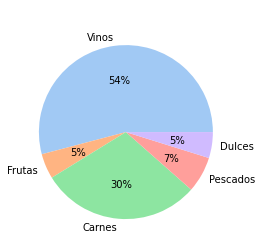

In [676]:
labels = ['Vinos', 'Frutas', 'Carnes', 'Pescados', 'Dulces']
colors = sns.color_palette('pastel')
plt.pie(data, labels=labels,colors = colors, autopct = '%0.00f%%')
plt.title("Porcentaje de Consumos", color='white')
plt.show()

In [677]:
#Según podemos ver las mayores compras en cantidad son de vino y carne, dejando por debajo a pesado, frutas y por último los dulces. 

* Visualizamos la cantidad de profesionales que realizan la compra

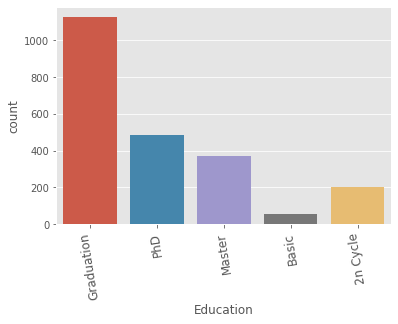

In [678]:
sns.countplot(x='Education', data=df);
plt.xticks(rotation=99, fontsize=12);

* Visualizamos los estados civiles para poder saber quienes son nuestros mayores clientes. 

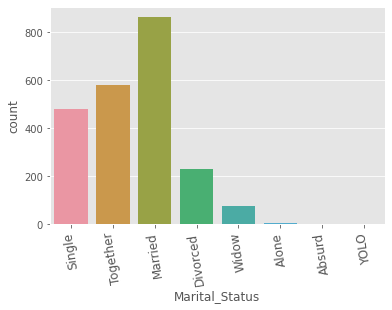

In [679]:
sns.countplot(x='Marital_Status', data=df);
plt.xticks(rotation=99, fontsize=12);

* Visualizamos Las aceptaciones por campaña

In [680]:
df['Response'].value_counts(normalize='true')

0    0.850893
1    0.149107
Name: Response, dtype: float64

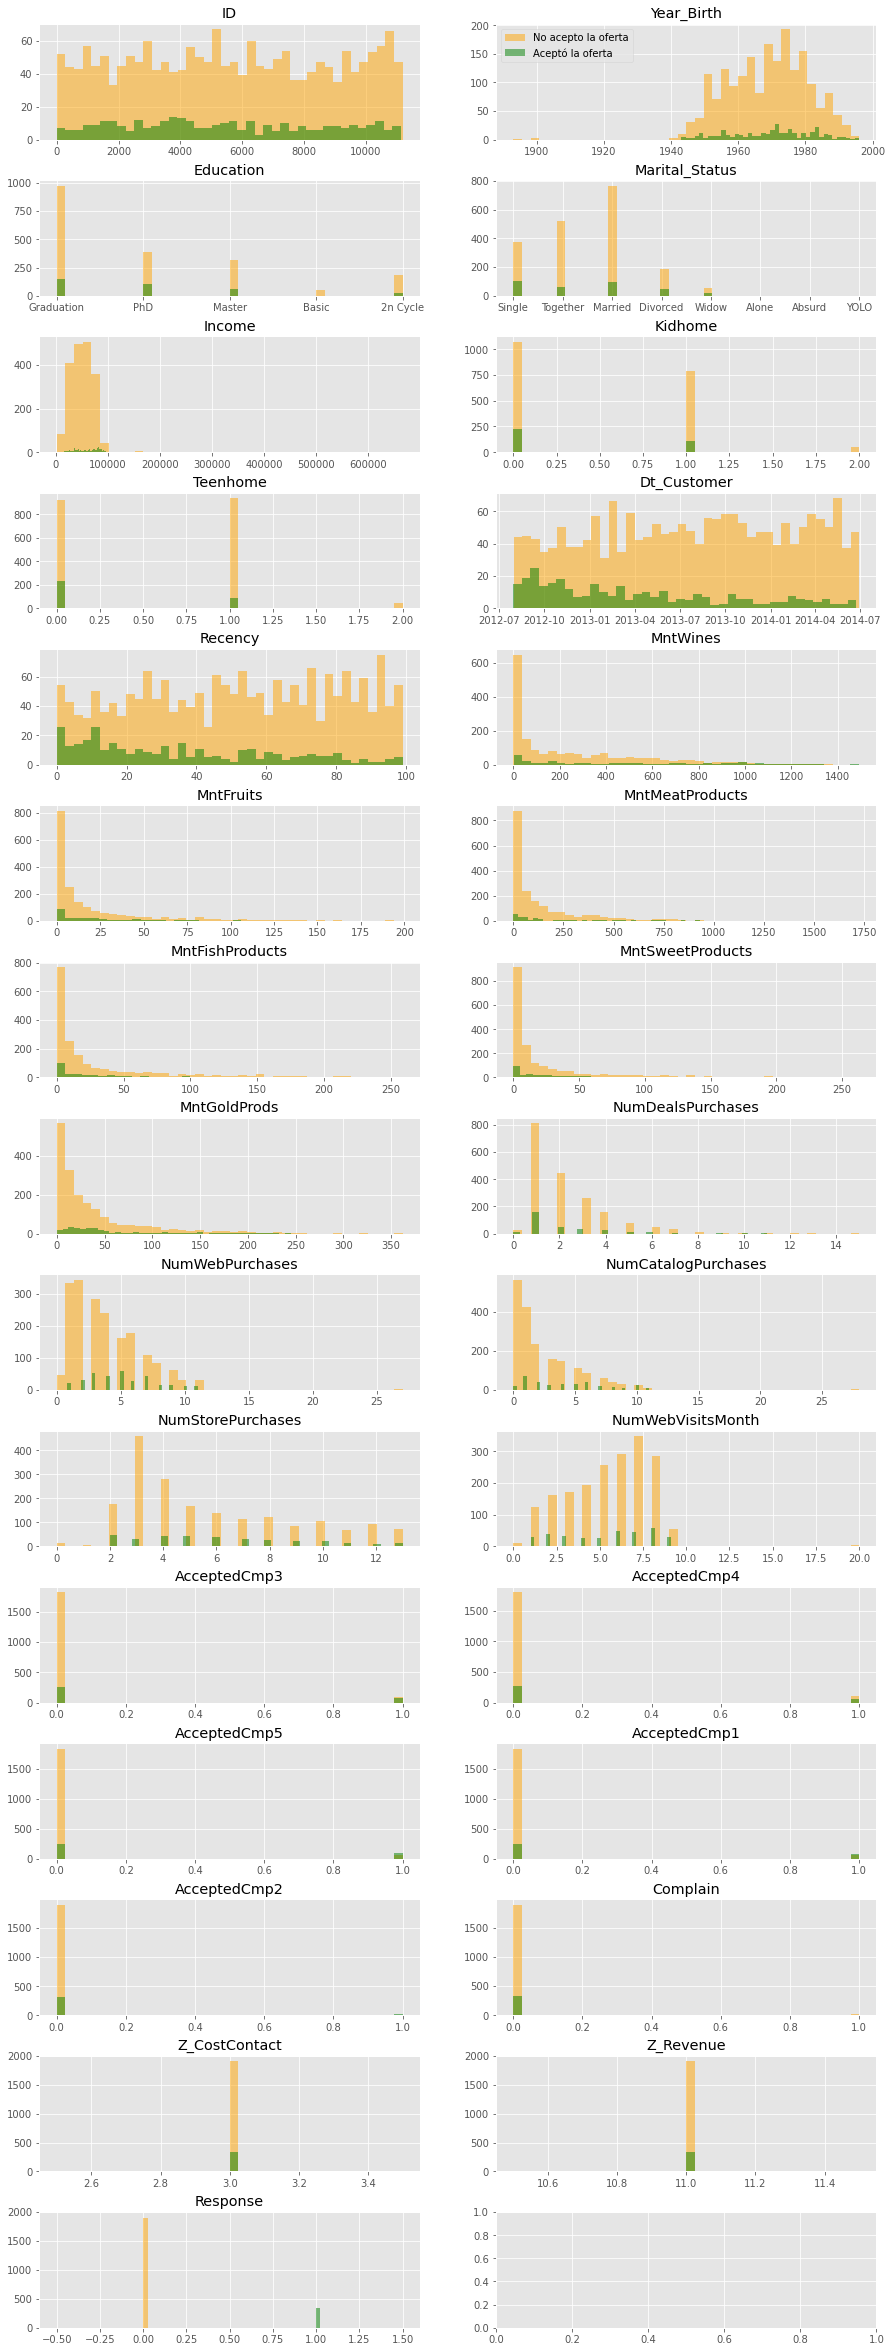

In [681]:
fig, axes = plt.subplots(15,2, figsize=(15,40))
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
no_compra = df[df['Response']==0]
compra = df[df['Response']==1]
axes = axes.ravel()
for i in range(len(df.columns)):
    axes[i].hist(no_compra.values[:,i], bins=40, color='orange', alpha=0.5)
    axes[i].hist(compra.values[:,i], bins=40, color='g', alpha=0.5)
    axes[i].set_title(df.columns[i])

axes[1].legend(['No acepto la oferta', 'Aceptó la oferta'])

* Visualizamos si hay valores atipicos

Text(0.5, 0.9, 'Valores atipicos')

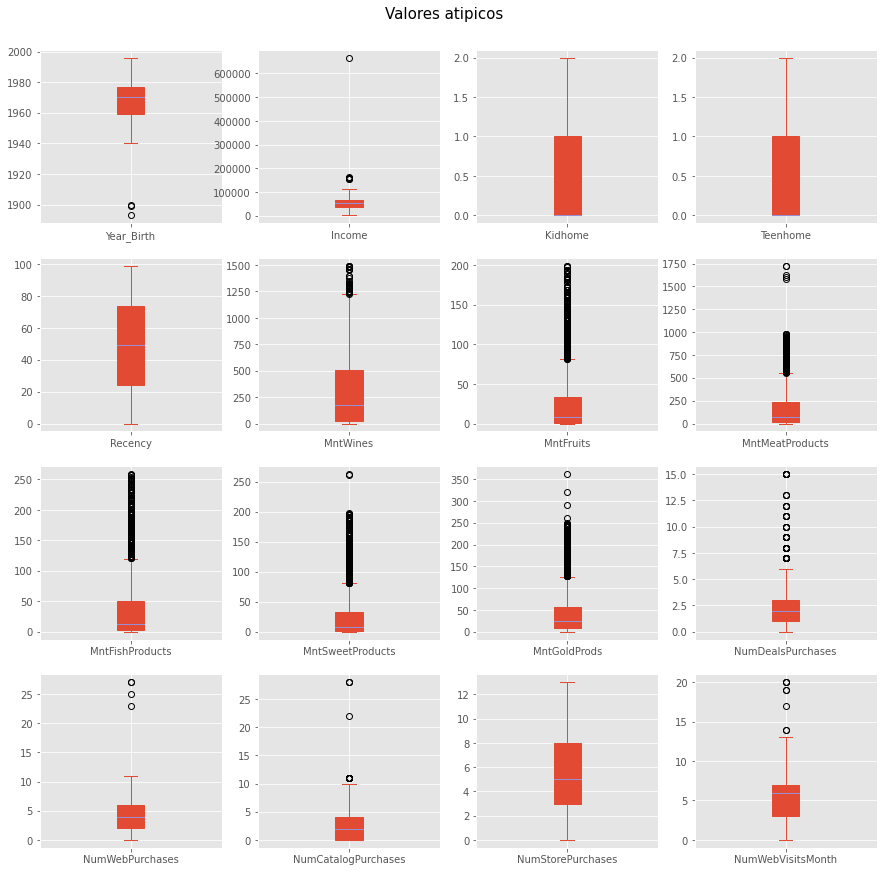

In [682]:

#plots
df_to_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Z_CostContact', 'Z_Revenue']).select_dtypes(include=np.number)
# subplots
df_to_plot.plot(subplots=True, layout=(8,4), kind='box', figsize=(15,30), patch_artist=True)
plt.suptitle('Valores atipicos', fontsize=15, y=0.9)


In [683]:
'''
Hay muchas columnas que tienen valores atípicos, pero la mayoría parece que los valores atípicos provienen de la población,
mientras que los valores atípicos en Year_birth parecen errores de entrada, ya que es imposible que las personas que nacieron 
antes de 1900 sigan vivas. Por lo tanto, eliminaré los valores atípicos en Year_birth.

'''

'\nHay muchas columnas que tienen valores atípicos, pero la mayoría parece que los valores atípicos provienen de la población,\nmientras que los valores atípicos en Year_birth parecen errores de entrada, ya que es imposible que las personas que nacieron \nantes de 1900 sigan vivas. Por lo tanto, eliminaré los valores atípicos en Year_birth.\n\n'

In [684]:
df.Year_Birth.describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [685]:
# Eliminamos valores atipicos
new_df = df[df.Year_Birth >= (df.Year_Birth.mean()-3*df.Year_Birth.std())]
new_df.Year_Birth.describe()

count    2237.000000
mean     1968.901654
std        11.701917
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

+ Creación de nuevas columnas categoricas

<font size="0.5">  

- Join_year: el año en que esa persona se convirtió en cliente, que se puede diseñar a partir de "Dt_Customer"
- Join_month: el mes en que esa persona se convirtió en cliente, que se puede diseñar desde "Dt_Customer"
- Join_weekday: el día de la semana en que la persona se convirtió en cliente, que se puede diseñar desde "Dt_Customer"
- Minorhome: La cantidad total de menores en su familia, que pueden ser adquiridas sumando por Kidhome y Teenhome.
- Total_Mnt: Monto total gastado en los últimos dos años, que se puede adquirir sumando todas las columnas relacionadas con "Mnt"
- Total_num_purchase: Número total de compras en los últimos dos años, que se puede adquirir sumando todas las columnas relacionadas con "Num"
- Total_accept: monto total que un cliente aceptó la oferta en la campaña de marketing, que se puede adquirir sumando todas las columnas relacionadas con "Aceptado" y la columna "Respuesta"
- "AOV": AOV representa el volumen de pedido promedio de cada cliente, que se puede diseñar dividiendo Total_Mnt por Total_num_purchase

</font>

In [686]:
new_df["Join_year"] = new_df.Dt_Customer.dt.year 
new_df["Join_month"] = new_df.Dt_Customer.dt.month 
new_df["Join_weekday"] = new_df.Dt_Customer.dt.weekday 
new_df["Minorhome"] = new_df.Kidhome + new_df.Teenhome 
new_df['Total_Mnt'] = new_df.MntWines+ new_df.MntFruits+ new_df.MntMeatProducts+ new_df.MntFishProducts+ new_df.MntSweetProducts+ new_df.MntGoldProds 
new_df['Total_num_purchase'] = new_df.NumDealsPurchases+ new_df.NumWebPurchases+ new_df.NumCatalogPurchases+ new_df.NumStorePurchases+ new_df.NumWebVisitsMonth 
new_df['Total_accept'] = new_df.AcceptedCmp1 + new_df.AcceptedCmp2 + new_df.AcceptedCmp2 + new_df.AcceptedCmp2  + new_df.AcceptedCmp3 + new_df.AcceptedCmp4 + new_df.AcceptedCmp5 + new_df.Response 
new_df['AOV'] = new_df.Total_Mnt/new_df.Total_num_purchase 

Text(0, 0.5, 'Campaña')

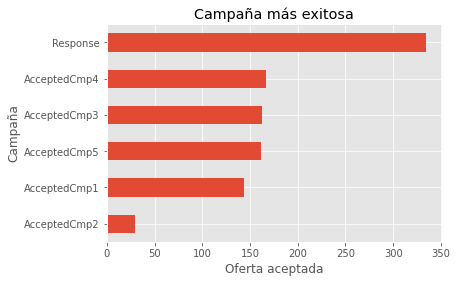

In [687]:
new_df[["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum().sort_values().plot.barh()
plt.title("Campaña más exitosa")
plt.xlabel("Oferta aceptada");
plt.ylabel("Campaña")


+ Visualizamos Numero de compras vs Numero de visitas por mes

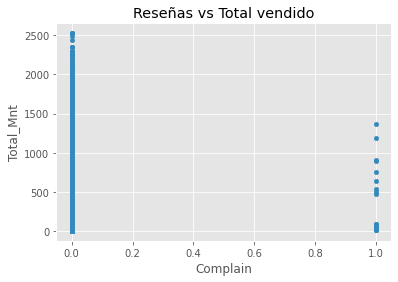

In [688]:

new_df.plot(x='Complain', y='Total_Mnt', kind='scatter')
plt.title("Reseñas vs Total vendido");

In [689]:
from scipy.stats import pearsonr

r, p_value  =  pearsonr(x=new_df['Complain'], y=new_df['Total_Mnt'])

# print results
print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  -0.03373965091266398
Pearson p-value:  0.11063526070950919


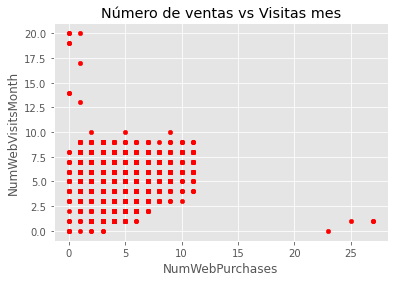

In [690]:

new_df.plot(x='NumWebPurchases', y='NumWebVisitsMonth', kind='scatter', color='r');
plt.title("Número de ventas vs Visitas mes");

<font size="1.5">  

# Seccion 3. Prepocesamiento de datos
</font>



1. Mapa de calor

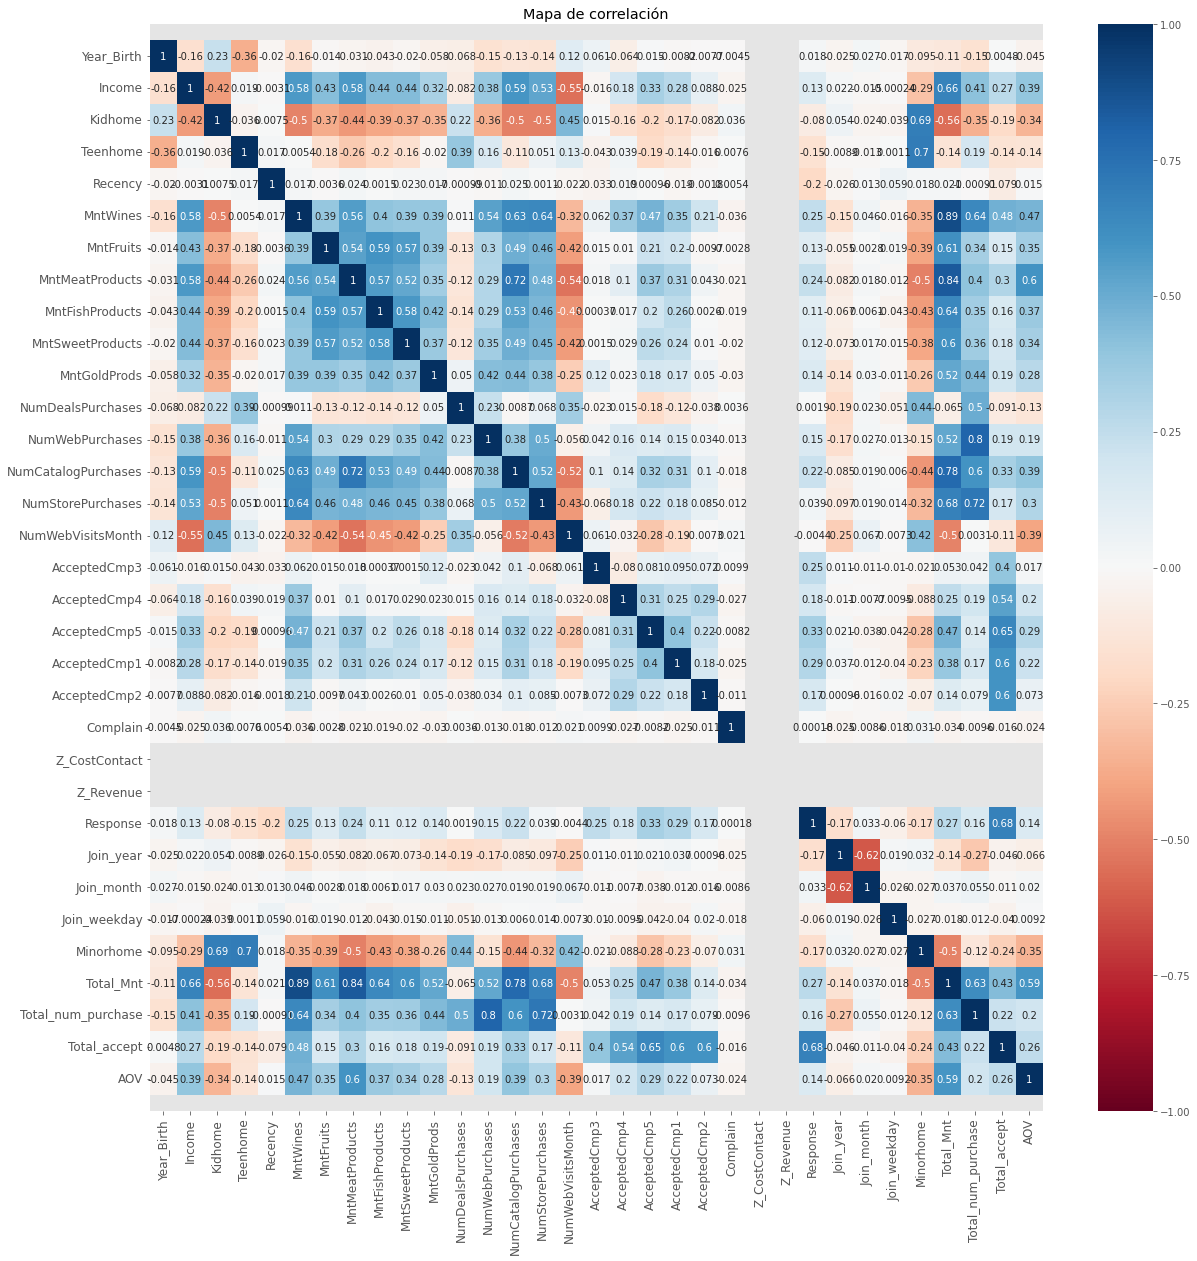

In [691]:
#Usamos un mapa de calor para ver las correlaciones entre cada variable. 


df_to_plot = new_df.drop(columns=['ID'])


plt.figure(figsize = (20, 20))
s = sns.heatmap(df_to_plot.corr(),  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0, annot=True)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Mapa de correlación")
plt.show()

Podemos usar un bloque aleatorio para predecir la cantidad de compras en la tienda y luego usar el puntaje de importancia de las características del modelo para clasificar los factores.  
<font size="1"> 
Consideramos 7 factores principales son:  
     1. Monto total gastado en los últimos dos años    
     2. Volumen medio de pedidos    
     3. Número total de compras en los últimos dos años  
     4. Cantidad gastada en vino en los últimos 2 años   
     5. Número de compras realizadas por catálogo  
     6. Número de visitas al sitio web de la empresa en el último mes    
     7. Número total de compras a través del sitio web en los últimos dos años     
<font>

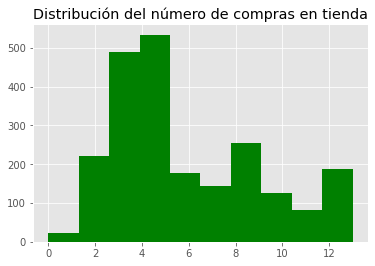

In [692]:
new_df.NumStorePurchases.hist(color='g')
plt.title("Distribución del número de compras en tienda");

In [695]:
rd_df = new_df.drop(columns=['ID', 'Dt_Customer','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response'])
rd_df.replace([np.inf, -np.inf], 0, inplace=True)

In [696]:
rd_df['Education'].replace({'Basic':1,'2n Cycle':2,'Graduation':3,'Master':4,'PhD':5}, inplace=True)

In [ ]:
Status=pd.get_dummies(rd_df['Marital_Status'])
rd_df=pd.concat([Status, rd_df], axis=1)
rd_df

,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Join_year,Join_month,Join_weekday,Minorhome,Total_Mnt,Total_num_purchase,Total_accept,AOV
0,0,0,0,0,1,0,0,0,1957,3,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,2012,9,1,0,1617,32,1,50.531250
1,0,0,0,0,1,0,0,0,1954,3,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,2014,3,5,2,27,11,0,2.454545
2,0,0,0,0,0,1,0,0,1965,3,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,2013,8,2,0,776,25,0,31.040000
3,0,0,0,0,0,1,0,0,1984,3,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,2014,2,0,1,53,14,0,3.785714
4,0,0,0,1,0,0,0,0,1981,5,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,2014,1,6,1,422,24,0,17.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,0,0,1,0,0,0,0,1967,3,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,3,11,2013,6,3,1,1341,23,0,58.304348
2236,0,0,0,0,0,1,0,0,1946,5,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,3,11,2014,6,1,3,444,29,1,15.310345
2237,0,0,1,0,0,0,0,0,1981,3,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,3,11,2014,1,5,0,1241,25,1,49.640000
2238,0,0,0,0,0,1,0,0,1956,4,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,3,11,2014,1,4,1,843,26,0,32.423077


### Modelo1    
Aplicamos KMeans a la base de datos

+ Dividimos la data por edad

In [ ]:
#Vamos a realizar un Clustering con el metodo K-Means para predecir los clientes que tendremos y enfocar la campaña de marketing

clu_df=new_df[['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Minorhome', 'Total_accept','Total_Mnt' ]]
clu_df['Year_Birth']=(clu_df[['Year_Birth']]-2022).abs()
clu_df.head()


,Year_Birth,Education,Marital_Status,Income,Minorhome,Total_accept,Total_Mnt
0,65,Graduation,Single,58138.0,0,1,1617
1,68,Graduation,Single,46344.0,2,0,27
2,57,Graduation,Together,71613.0,0,0,776
3,38,Graduation,Together,26646.0,1,0,53
4,41,PhD,Married,58293.0,1,0,422


In [ ]:
#Clasificamos la educacion del 1 al 5
clu_df['Education'].unique()
['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']
clu_df['Education'].replace({'Basic':1,'2n Cycle':2,'Graduation':3,'Master':4,'PhD':5}, inplace=True)


Aplicamos un get dummies al estado civil 

In [ ]:

Status=pd.get_dummies(clu_df['Marital_Status'])
clu_df=pd.concat([Status, clu_df], axis=1)
clu_df=clu_df.drop('Marital_Status', axis=1)

In [ ]:
#Aplicamos una estandarizacion robusta para el Ingreso para reducir los outlier en el rango intercuartil
clu_norm=(clu_df-clu_df.min())/(clu_df.max()-clu_df.min())
clu_norm


,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO,Year_Birth,Education,Income,Minorhome,Total_accept,Total_Mnt
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.696429,0.50,0.084832,0.000000,0.142857,0.639683
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.750000,0.50,0.067095,0.666667,0.000000,0.008730
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.553571,0.50,0.105097,0.000000,0.000000,0.305952
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.214286,0.50,0.037471,0.333333,0.000000,0.019048
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.267857,1.00,0.085065,0.333333,0.000000,0.165476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.517857,0.50,0.089472,0.333333,0.000000,0.530159
2236,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.892857,1.00,0.093669,1.000000,0.142857,0.174206
2237,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.267857,0.50,0.083092,0.000000,0.142857,0.490476
2238,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.714286,0.75,0.101536,0.333333,0.000000,0.332540


In [ ]:
km_perk = [KMeans(n_clusters=k, random_state=42).fit(clu_norm) for k in range(1,20)]
km_perk

[KMeans(n_clusters=1, random_state=42),
 KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42),
 KMeans(n_clusters=10, random_state=42),
 KMeans(n_clusters=11, random_state=42),
 KMeans(n_clusters=12, random_state=42),
 KMeans(n_clusters=13, random_state=42),
 KMeans(n_clusters=14, random_state=42),
 KMeans(n_clusters=15, random_state=42),
 KMeans(n_clusters=16, random_state=42),
 KMeans(n_clusters=17, random_state=42),
 KMeans(n_clusters=18, random_state=42),
 KMeans(n_clusters=19, random_state=42)]

In [ ]:
silhouette_scores = [silhouette_score(clu_norm, model.labels_) for model in km_perk[1:]]

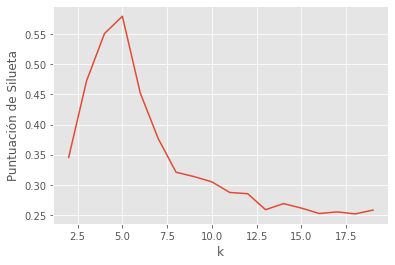

In [ ]:
plt.plot(range(2,20), silhouette_scores)
plt.xlabel('k')
plt.ylabel('Puntuación de Silueta')
plt.show()

In [ ]:
inertias = [model.inertia_ for model in km_perk]
inertias

[2180.3922629613,
 1474.2152938629324,
 985.5881809016067,
 678.5679234567926,
 563.6621355786863,
 509.4771804633656,
 469.9520257854416,
 433.35310332276265,
 401.4139099030043,
 380.9082033294645,
 364.9075672382472,
 349.1169847477953,
 334.1416328388753,
 327.5465611921979,
 311.91389383979583,
 303.25832665389146,
 295.67031475310046,
 289.1315421624633,
 278.74518374614064]

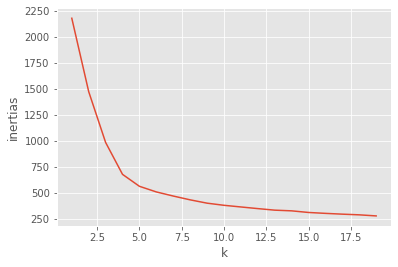

In [ ]:
plt.plot(range(1,20),inertias)
plt.xlabel('k')
plt.ylabel('inertias')
plt.show()

La mejor opcion se encuentra en 5

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(clu_norm)
kmeans.labels_

array([0, 0, 1, ..., 4, 1, 2], dtype=int32)

In [ ]:
df_clusters = pd.DataFrame(kmeans.labels_, columns=['Cluster'])
df_clusters.head()

,Cluster
0,0
1,0
2,1
3,1
4,2


<AxesSubplot:ylabel='Cluster'>

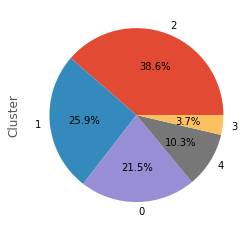

In [ ]:
df_clusters['Cluster'].value_counts().plot.pie(autopct="%.1f%%")

In [ ]:
clu_norm['cluster'] = kmeans.labels_

In [ ]:
clu_norm.groupby('cluster').mean()

,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO,Year_Birth,Education,Income,Minorhome,Total_accept,Total_Mnt
cluster,,,,,,,,,,,,,,
0,0.002079,0.002079,0.0,0.0,0.995842,0.0,0.000000,0.00000,0.433361,0.603430,0.074133,0.289674,0.076329,0.239242
1,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.000000,0.00000,0.502406,0.609240,0.077378,0.327001,0.061929,0.238587
2,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.00000,0.471788,0.616030,0.075194,0.322531,0.061839,0.232461
3,0.012195,0.024390,0.0,0.0,0.000000,0.0,0.939024,0.02439,0.659625,0.685976,0.081844,0.296748,0.090592,0.286377
4,0.000000,0.000000,1.0,0.0,0.000000,0.0,0.000000,0.00000,0.525665,0.626623,0.076961,0.334776,0.077922,0.241266


In [ ]:
pca=pca=PCA(n_components=5)
pca_clu=pca.fit_transform(clu_norm)
pca_clu_df=pd.DataFrame(data=pca_clu, columns=['Cliente1', 'Cliente2','Cliente3', 'Cliente4','Cliente5'])
pca_clientes=pd.concat([pca_clu_df, clu_norm[['cluster']]],axis=1)
pca_clientes

,Cliente1,Cliente2,Cliente3,Cliente4,Cliente5,cluster
0,-1.691516,-0.131628,0.623898,0.475159,0.014183,0.0
1,-1.685106,-0.129087,0.588600,-0.441914,-0.108871,0.0
2,-0.623247,0.668929,-0.470227,0.255890,0.158925,1.0
3,-0.627966,0.652270,-0.480774,-0.185024,0.241780,1.0
4,0.563807,-0.578452,-0.234557,-0.037031,-0.241170,2.0
...,...,...,...,...,...,...
2235,-0.614727,0.681874,-0.481593,0.071829,-0.205609,2.0
2236,0.577133,-0.551517,-0.250932,-0.285128,-0.512341,1.0
2237,NaN,NaN,NaN,NaN,NaN,4.0
2238,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
pca_clientes=pca_clientes.dropna()

### Modelo 2

In [ ]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i, max_iter=500)
    kmeans.fit(clu_norm)
    wcss.append(kmeans.inertia_)

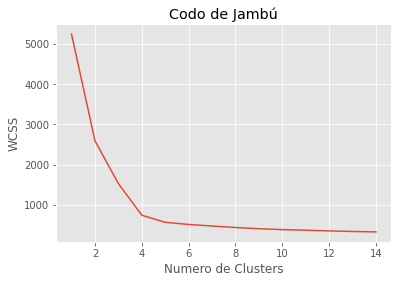

In [ ]:
#Graficamos los resultados de WCSS para formar el codo de Jambú
plt.plot(range(1,15),wcss)
plt.title('Codo de Jambú')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS')#es un indicador de que tan similar son los individuos dentro de los clusters
plt.show()

In [ ]:
#El mejor punto donde dejar de disminur de manera drastica es 2, por lo que esta es la cantidad de cluster a realizar. 

In [ ]:
clustering=KMeans(n_clusters=4, max_iter=500)#crea el modelo
clustering.fit(clu_norm)


KMeans(max_iter=500, n_clusters=4)

In [ ]:
clu_df['KMeans_Clusters']= clustering.labels_
clu_df.head()

,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO,Year_Birth,Education,Income,Minorhome,Total_accept,Total_Mnt,KMeans_Clusters
0,0,0,0,0,1,0,0,0,65,3,58138.0,0,1,1617,0
1,0,0,0,0,1,0,0,0,68,3,46344.0,2,0,27,0
2,0,0,0,0,0,1,0,0,57,3,71613.0,0,0,776,2
3,0,0,0,0,0,1,0,0,38,3,26646.0,1,0,53,2
4,0,0,0,1,0,0,0,0,41,5,58293.0,1,0,422,1


In [ ]:
pca=PCA(n_components=2)
pca_clu=pca.fit_transform(clu_norm)
pca_clu_df=pd.DataFrame(data=pca_clu, columns=['CTipo1', 'CTipo2'])
pca_clientes=pd.concat([pca_clu_df, clu_df[['KMeans_Clusters']]],axis=1)
pca_clientes

,CTipo1,CTipo2,KMeans_Clusters
0,-1.691516,-0.131628,0.0
1,-1.685106,-0.129087,0.0
2,-0.623247,0.668929,2.0
3,-0.627966,0.652270,2.0
4,0.563807,-0.578452,1.0
...,...,...,...
2235,-0.614727,0.681874,1.0
2236,0.577133,-0.551517,2.0
2237,NaN,NaN,3.0
2238,NaN,NaN,2.0


### Clusteriza mucho mejor el modelo 1 con 5 grupos diferentes de clientes

<font size="1.5">  

# Sección 05: Seleccion que tipo de producto se adecuan más a nuestro cliente según su perfil
</font>

Queremos encontrar 

+ Dividimos la información

Vamos a realizar un Random Forest para predecir el numero de compras 

+ Entrenamos el modelo

In [700]:
rd_df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Join_year', 'Join_month', 'Join_weekday', 'Minorhome',
       'Total_Mnt', 'Total_num_purchase', 'Total_accept', 'AOV'],
      dtype='object')

In [698]:
X=rd_df.drop(columns=['NumStorePurchases', 'Marital_Status']) 
y=rd_df['NumStorePurchases']  

# Dividimos el data set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 


In [701]:
#Creamos un RandomForest
rg = RandomForestRegressor(n_estimators=200, n_jobs=-1)
rg.fit(X_train, y_train)
y_pred=rg.predict(X_test)


In [702]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7566741071428572
Mean Squared Error: 1.3917269717261904
Root Mean Squared Error: 1.1797147840584987


El rango de NumStorePurchases es 13, y el error cuadrático medio es solo 1.17 (menos del 10% del rango), lo que significa que es un modelo confiable.

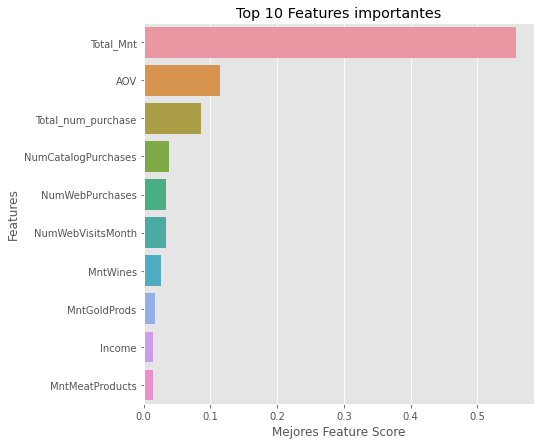

In [704]:
# Encontramos puntos importantes

feature_imp = pd.Series(rg.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

feature_imp = feature_imp[:10]

# Creating a bar plot
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Mejores Feature Score')
plt.ylabel('Features')
plt.title('Top 10 Features importantes' )
plt.savefig('important_feautres.png', bbox_inches='tight')
plt.show()

 96%|=================== | 647/672 [00:22<00:00]       

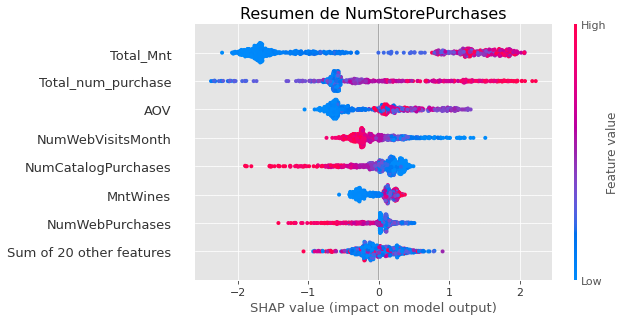

<Figure size 432x288 with 0 Axes>

In [706]:
import shap

# shap values 
ex = shap.Explainer(rg, X_train)
shap_values = ex(X_test)

plt.title('Resumen de NumStorePurchases', size=16)
fig = shap.plots.beeswarm(shap_values, max_display=8)
plt.savefig('SHAP.png', bbox_inches='tight')
plt.show()

Resumen:
1. El número de compras en la tienda aumenta con una mayor cantidad total gastada, mayor cantidad total de compras, mayor AOV y mayor cantidad de compras de vinos.
2. El número de compras en tienda disminuye con mayor número de visitas al sitio web, mayor número de compras a través de catálogo y mayor número de compras a través de sitios web.
    
3. Las personas que compran principalmente en la tienda tienden a comprar más vinos, tienen un volumen promedio de pedidos más alto y compran menos a través de Internet o del catálogo.

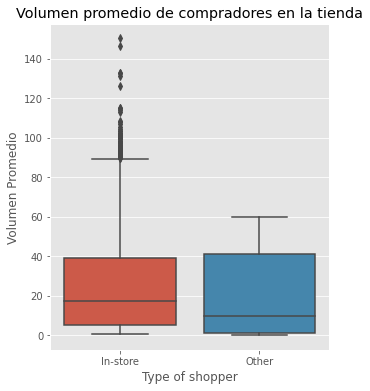

In [712]:
store_shoppers = new_df[new_df.NumStorePurchases>0]
store_shoppers = store_shoppers[store_shoppers.AOV <= (store_shoppers.AOV.mean()+3*store_shoppers.AOV.std())]
store_shoppers['Type of shopper'] = "In-store"
other_shoppers = new_df[new_df.NumStorePurchases==0]
other_shoppers['Type of shopper'] = "Other"

plt.figure(figsize = (5, 6))
all_shoppers = store_shoppers.append(other_shoppers)
plt.title("Volumen promedio de compradores en la tienda")
sns.boxplot(data = all_shoppers, x = 'Type of shopper', y = 'AOV')
plt.ylabel("Volumen Promedio")
plt.savefig('AOV.png', bbox_inches='tight')

### Segundo Modelo:

Vamos a realizar un analisis aplicando herramientas de machine learning de clasificacion para encontrar y predecir los mejores productos

In [720]:
rd_df2 =rd_df.copy()
rd_df2.columns


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Join_year', 'Join_month', 'Join_weekday', 'Minorhome',
       'Total_Mnt', 'Total_num_purchase', 'Total_accept', 'AOV'],
      dtype='object')

In [722]:
Status=pd.get_dummies(rd_df2['Marital_Status'])
rd_df2=pd.concat([Status, rd_df2], axis=1)
rd_df2.head()

,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Join_year,Join_month,Join_weekday,Minorhome,Total_Mnt,Total_num_purchase,Total_accept,AOV
0,0,0,0,0,1,0,0,0,1957,3,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,2012,9,1,0,1617,32,1,50.531250
1,0,0,0,0,1,0,0,0,1954,3,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,2014,3,5,2,27,11,0,2.454545
2,0,0,0,0,0,1,0,0,1965,3,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,2013,8,2,0,776,25,0,31.040000
3,0,0,0,0,0,1,0,0,1984,3,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,2014,2,0,1,53,14,0,3.785714
4,0,0,0,1,0,0,0,0,1981,5,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,2014,1,6,1,422,24,0,17.583333


In [723]:
X=rd_df2.drop(columns=['Total_accept','Marital_Status'])  
y=rd_df2['Total_accept'] 

In [724]:
#Dividimos los valores
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [725]:
#Entrenamos el modelos con 200 arboles
rg2 = RandomForestRegressor(n_estimators=200, n_jobs=-1)
rg2.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1)

In [727]:
#Predicimos 
y_pred=rg2.predict(X_test)
y_pred


array([3.25000000e-01, 2.05000000e-01, 2.49666667e+00, 6.17500000e-01,
       1.01125000e+00, 4.65000000e-01, 5.01583333e-01, 1.89500000e+00,
       1.35000000e-01, 4.50000000e-02, 2.20000000e-01, 9.00000000e-02,
       2.15500000e+00, 1.00000000e-01, 0.00000000e+00, 6.50000000e-02,
       1.76416667e+00, 4.15000000e-01, 2.02500000e+00, 8.45000000e-01,
       7.08333333e-02, 7.90000000e-01, 1.52050000e+00, 1.00000000e-01,
       1.81500000e+00, 1.90500000e+00, 3.00000000e-02, 7.79166667e-02,
       1.40500000e+00, 3.40000000e-01, 3.50000000e-02, 9.30000000e-01,
       1.30000000e-01, 1.25000000e-02, 8.50000000e-02, 5.15000000e-01,
       5.50000000e-02, 4.05000000e+00, 7.18333333e-01, 5.55000000e-01,
       3.50000000e-02, 3.50000000e-02, 1.00000000e-02, 3.00000000e-01,
       8.50000000e-02, 8.95000000e-01, 6.50000000e-02, 2.45500000e+00,
       1.05000000e-01, 4.35000000e-01, 4.15000000e-01, 3.90000000e-01,
       2.00000000e-02, 1.73583333e+00, 4.15000000e-01, 2.38500000e+00,
      

In [728]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.47354846938775513
Mean Squared Error: 0.6914010048506507
Root Mean Squared Error: 0.8315052644756079


In [731]:
from scipy.stats import pearsonr

list_ = ['MntWines', 'MntMeatProducts','MntGoldProds', 'MntFishProducts', 'MntFruits',  'MntSweetProducts']
for i in list_:
    r, p_value  =  pearsonr(x=new_df[i], y=new_df['Total_accept'])
    print(i, "vs Total_accept:")
    # print results
    print('Pearson correlation (r): ', r)
    print('Pearson p-value: ', p_value)
    print(" ")

MntWines vs Total_accept:
Pearson correlation (r):  0.47877613689047055
Pearson p-value:  1.538453690271273e-128
 
MntMeatProducts vs Total_accept:
Pearson correlation (r):  0.3010334250296998
Pearson p-value:  4.4065093290159594e-48
 
MntGoldProds vs Total_accept:
Pearson correlation (r):  0.19068006658523504
Pearson p-value:  9.275051767778576e-20
 
MntFishProducts vs Total_accept:
Pearson correlation (r):  0.15914618281257262
Pearson p-value:  3.697344094817059e-14
 
MntFruits vs Total_accept:
Pearson correlation (r):  0.14976326660144543
Pearson p-value:  1.082631664111806e-12
 
MntSweetProducts vs Total_accept:
Pearson correlation (r):  0.178089851831021
Pearson p-value:  2.1328375413163002e-17
 


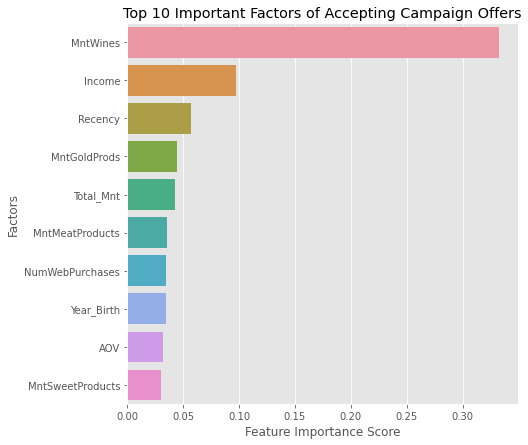

In [730]:
# Visualizamos la importancia de los mejores score
import pandas as pd
feature_imp = pd.Series(rg2.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

feature_imp = feature_imp[:10]

# Creamos un grafico
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Etiquetamos el gráfico
plt.xlabel('Feature Importance Score')
plt.ylabel('Factors')
plt.title("Top 10 Important Factors of Accepting Campaign Offers")
plt.savefig('important_feautres.png', bbox_inches='tight')
plt.show()

### Conclusiones

Según el clustering hemos podido dividir a nuestro cliente en 5 grupos y realizar un analisis de los productos y del cliente promedio
Cliente Promedio
- tiene un ingreso anual de 52200 dolares
- había comprado hace 49 días
- tiene un AOV de 26,8 dólares
- ha gastado 605 dolares
- ha comprado 20 veces
- se hizo cliente a mediados de junio
- se hizo cliente el jueves
- gastó más en vinos (300 dólares) y luego en productos cárnicos (165 dólares)
- gastó menos en frutas (26 dólares) y productos dulces (27 dólares

Caracteristicas a considerar en un campaña de Mk: 
- Años
- Ingresos
- Cuantos menores hay en casa
- Fecha de Registro
- Productos de: carne, vino, pescado, frutas, productos dulces.
- Canales: Numero de ventas, Compras por catalogo, Compras por la tienda
- Total: Volumen del pedido promedio, Numero de compras, Total de monto gastado. 